## 1. Selecting and analyzing the dataset

### Student Performance in Exams
This dataset provides a detailed snapshot of high school students' performance in exams, focusing on their scores in mathematics, reading, and writing. It includes essential demographic, social, and academic variables that are known to influence academic outcomes. The dataset consists of 1,000 observations, where each row represents a unique student, and includes various attributes such as gender, race/ethnicity, parental education levels, test preparation status, lunch type, and scores in three key academic subjects. This dataset can be leveraged to analyze trends, correlations, and disparities in academic performance based on socioeconomic and educational factors.

Source: [https://www.kaggle.com/datasets/timothyadeyemi/students-performance-in-exams](https://www.kaggle.com/datasets/timothyadeyemi/students-performance-in-exams)

### Feature descriptions
| Attribute | Description |
|---|---|
|Gender| 	This column categorizes students by their gender (Male, Female). Allows for the exploration of gender-based performance trends in math, reading, and writing scores.|
|Race/Ethnicity|Coded into five groups (Group A to Group E), this feature represents the racial or ethnic background of the student. Enables analysis of how ethnic backgrounds influence exam performance.|
|Parental Level of Education|Describes the highest educational attainment of the student’s parents (e.g., High School, Some College, Associate’s Degree, Bachelor’s Degree, Master’s Degree). This variable is useful in understanding the impact of parental education on students' academic achievements.|
|Lunch Type|Indicates whether the student receives a standard lunch or a free/reduced-price lunch. This feature can be used to study the relationship between socioeconomic status and academic performance.|
|Test Preparation Course|Describes whether the student completed a test preparation course (Completed or None). Examines the influence of structured test preparation on academic outcomes.|
|Math Score|This column records the student’s performance in mathematics (on a scale of 0-100). A key outcome variable for assessing performance in a core subject.|
|Reading Score|Similar to the math score, this feature captures the student’s performance in reading (on a scale of 0-100). Provides insight into students' literacy and comprehension abilities.|
|Writing Score|Represents the student’s performance in writing (on a scale of 0-100). Allows for analysis of written communication skills and overall language proficiency.|


### 1.1 Read and treat missing values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('StudentsPerformance.csv')

# Check if the dataset contains any placeholder values
print("\nChecking for placeholder values:")
placeholders = ['?', 'N/A', 'NA', 'None', '']

for placeholder in placeholders:
    print(f"Number of '{placeholder}' entries in each column:")
    print((df == placeholder).sum())


Checking for placeholder values:
Number of '?' entries in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Number of 'N/A' entries in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Number of 'NA' entries in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Number of 'None' e

It is good practice to look at whether the dataset to be analyzed has missing data. If it does, it can be filled with random values ​​similar to the other features, or the row can be deleted completely. In this case, there is no data loss.

### 1.2 Encode features

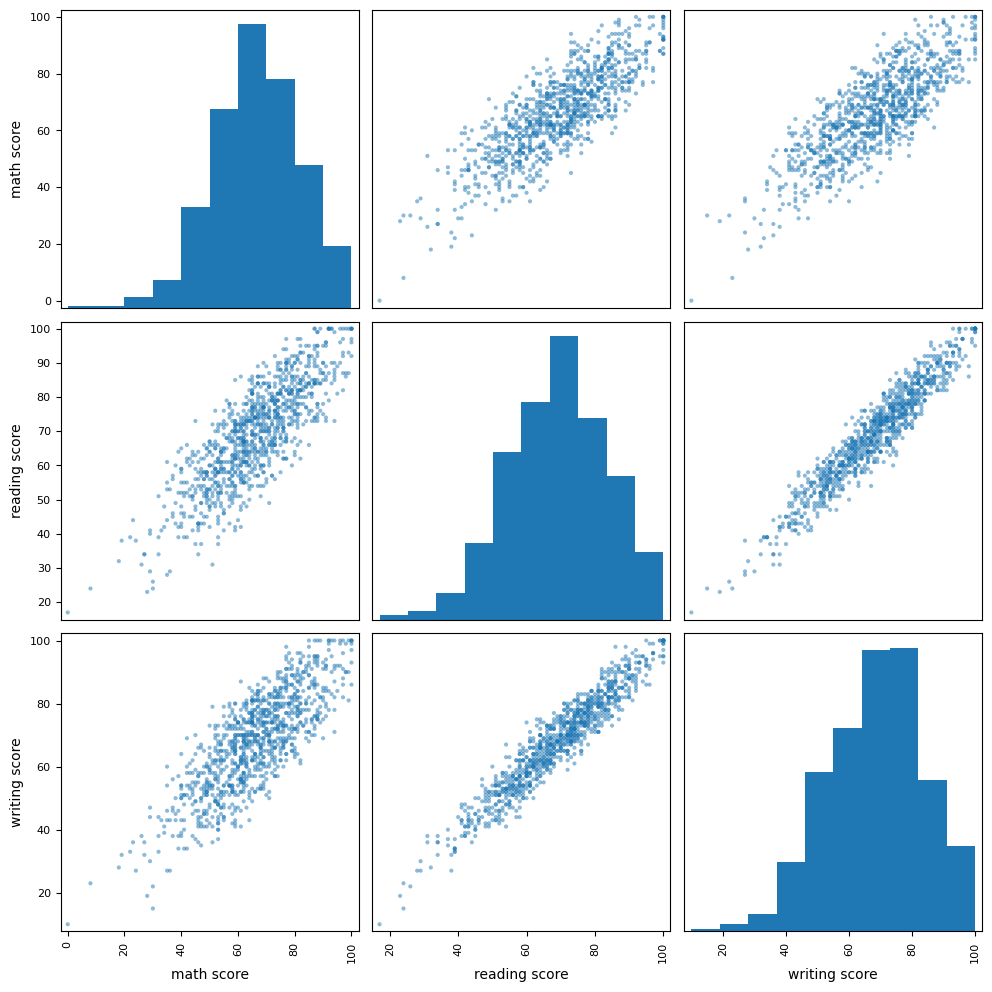

In [2]:
pd.plotting.scatter_matrix(df, figsize=(10,10));
plt.tight_layout(pad=1.0) 

As can be seen in the previous plot, only the numerical features (Math Score, Reading Score and Writing Score) have been taken into account to perform the scatter matrix. However, non numerical features (Gender, Race/Ehnicity, Parental Level of Education, Lunch Type and Test Preparation Course) have not. Therefore, it's necessary to convert this categorical features into numerical in order to perform the analysis correctly.

In the following code, one hot encoding.

> One Hot Encoding is a method for converting categorical variables into a binary format. It creates new binary columns (0s and 1s) for each category in the original variable. Each category in the original column is represented as a separate column, where a value of 1 indicates the presence of that category, and 0 indicates its absence.


In [3]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset to avoid modifying the original dataframe
df_encoded = df.copy()

# Use pd.get_dummies() to one-hot encode the categorical columns
# drop_first = True automatically removes one of the two columns and avoids redundancy, 
# since the categories are mutually exclusive.
df_encoded = pd.get_dummies(df, columns=['gender','lunch', 'test preparation course'], drop_first=True)

# The following features have more than two possible values, therefore, they are not mutually exclusive.
df_encoded = pd.get_dummies(df_encoded, columns=['race/ethnicity','parental level of education'])
df_encoded = df_encoded.astype(int)

### 1.3 Look for outliers
The goal of the analysis will be to make the Math score prediction. In principle, all the features could be related to it and there is no indication of irrelevant data that should be eliminated from the set. What's more, as seen in the previous plot, continuous variables don't show unexpected values.

### 1.4 Data Normalization
It's necessary normalize data since some features vary between 0 and 100, whereas others between 0 and 100. Back-propagation and many gradient-based algorithms are sensitive to feature scaling because features with larger ranges dominate the gradient updates, potentially leading to slower convergence or suboptimal models.

In [4]:
# Create a min max scaler and scale all the features of the dataset. In this case between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# 2. Fit and traing the model

The second part of this activity is the programming of a neural network with backpropagation from scratch.

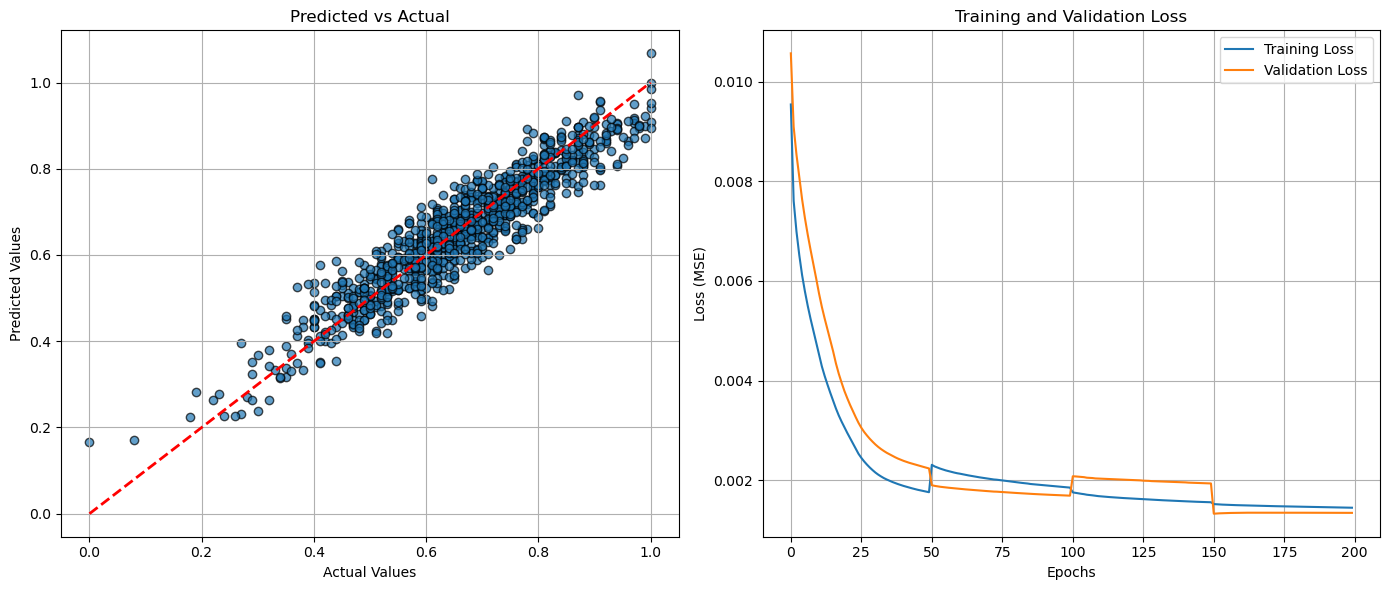

In [5]:
import NeuralNet as NN

# Separate the input and the output features, output is Math Score.
X, y = df_encoded_scaled.drop("math score", axis=1), df_encoded_scaled["math score"]

# Convert DataFrame to numpy arrays for KFold indexing
X = X.to_numpy()
y = y.to_numpy()

# Neural Network Hyperparameters
layers = [len(df_encoded_scaled.columns) - 1, 9, 5, 1]  
epochs = 50
learning_rate = 0.001
fact = 'relu'
momentum = 0.9
n_splits = 4

nn = NN.NeuralNet(layers, epochs, learning_rate, momentum, fact, n_splits)
nn.fit(X, y)
y_pred = nn.predict(X)
training_loss, validation_loss = nn.loss_epochs()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Predicted vs Actual
axes[0].scatter(y, y_pred, alpha=0.7, edgecolors='k')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# 2. Training and Validation Loss over Epochs
axes[1].plot(training_loss, label='Training Loss')
axes[1].plot(validation_loss, label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss (MSE)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# 3. Obtaining and comparing predictions using the three models (BP, BP-F, MLR-F)

This part is focused on comparing the results of the backpropagation model that has been developed against two open-source implementationsof machine learning methods.

## 3.1 Hyperparameter comparison and selection

First, we need to choose the correct set of hyperparameters that will provide the best prediction for the neural network that we have implemented. For this reason, we will have to estimate what are the optimal values for the network hyperparameters.

To find these parameters, we must explore some of the space of hyperparameters, and evaluate the quality of the results of the prediction obtained using them.

### 3.1.1 GridSearchCV Hyperparameters Analysis

One option would be to fiddle with the hyperparameters manually, until you find a great  combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.

Instead, you can use Scikit-Learn's GridSearchCV class to search for you. All you need to do is tell it which hyperparameters you want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values. For example, the following code searcher for the best combination of hyperparameter values for the NeuralNet:

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import NeuralNetWrapper as nnw

perform_GridSearchCV = False

if perform_GridSearchCV:

    # Create test data
    X, y = make_regression(n_samples=1000, n_features=16, noise=0.1, random_state=42)
    y = y.reshape(-1, 1)

    # Normalize the data
    scaler = StandardScaler()

    # Define the neural network wrapper
    nn_model = nnw.NeuralNetWrapper(layers=[16, 9, 5, 1])

    # Setting hyperparameters for GridSearchCV
    param_grid = {
        "nn__epochs": [100, 200],               
        "nn__learning_rate": [0.01, 0.001],
        "nn__momentum": [0.5, 0.9],
        "nn__fact": ["sigmoid", "tanh", "relu", "linear"],
        "nn__n_splits": [2, 4, 5],
    }

    # Create a pipeline (normalization + model)
    pipeline = Pipeline([
        ("scaler", scaler),
        ("nn", nn_model)
    ])

    # GridSearchCV with cross validation
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring="neg_mean_squared_error",
        cv=3,
        verbose=0
    )

    # Adjust the model
    grid_search.fit(X, y)

    # Show best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best score (MSE):", -grid_search.best_score_)

As can be seen in the previous analysis, the best hyperparameters according to the GridSearchCV class are:

| Number of layers | Layer Structure | Num epochs | Learning rate | Momentum | Activation Function | Number of Splits |
|---|---|---|---|---|---|---|
|4|[16,9,5,1]|100|0.001|0.5|ReLU|4|


### 3.2.2 Fiddle Hyperparameters manually

In this section, let's fiddle with some hyperparameters manually and plot the predicted vs actual values and the training and validation loss

> Discalimer: Some comparisons may fail since some combinations of Hyperparameters can lead to high values that are not supported by numpy library, causing NaN results

#### Comparison 1

| Number of layers | Layer Structure | Num epochs | Learning rate | Momentum | Activation Function | MAPE | MAE | MSE |
|---|---|---|---|---|---|---|---|---|
|4|[16,9,5,1]|200|0.001|0.9|ReLU|28.0572|0.0435|0.003|

  - Mean Squared Error (MSE): 0.0031
  - Mean Absolute Error (MAE): 0.0445
  - Mean Absolute Percentage Error (MAPE): 28.0200%


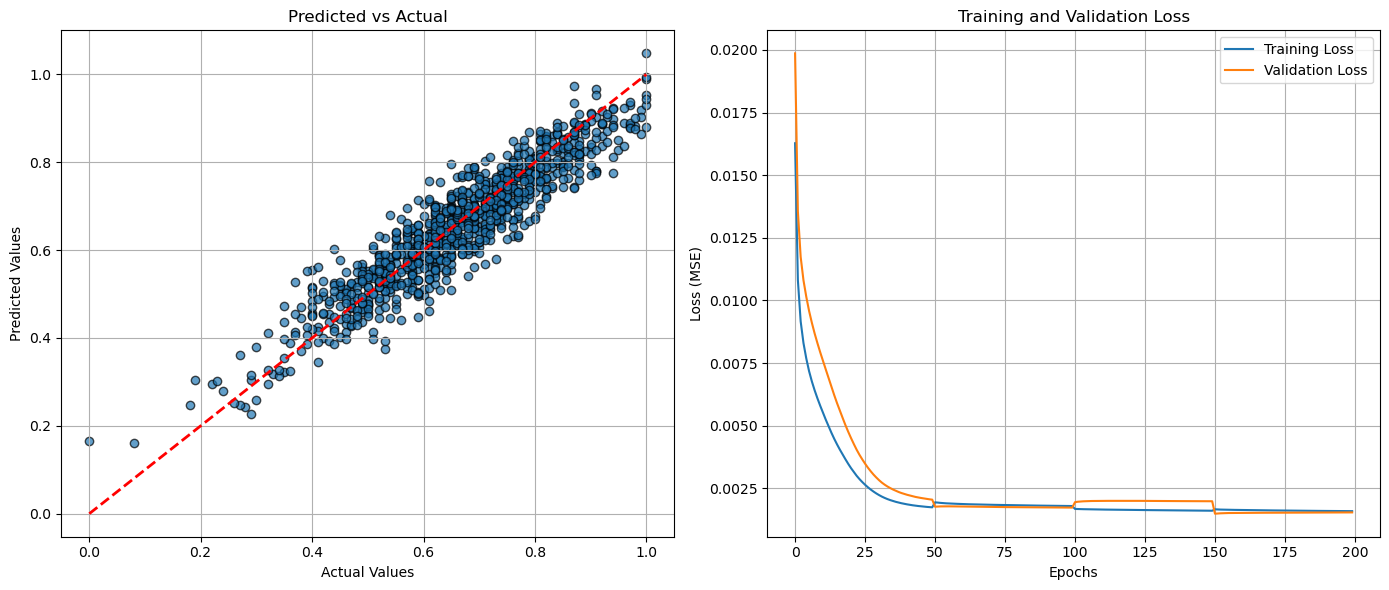

In [7]:
import NeuralNet as NN
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Separate the input and the output features, output is Math Score.
X, y = df_encoded_scaled.drop("math score", axis=1), df_encoded_scaled["math score"]

# Convert DataFrame to numpy arrays for KFold indexing
X = X.to_numpy()
y = y.to_numpy()

# Neural Network Hyperparameters
layers = [len(df_encoded_scaled.columns) - 1, 9, 5, 1]  
epochs = 50
learning_rate = 0.001
fact = 'relu'
momentum = 0.9
n_splits = 4

nn = NN.NeuralNet(layers, epochs, learning_rate, momentum, fact, n_splits)
nn.fit(X, y)
y_pred = nn.predict(X)
training_loss, validation_loss = nn.loss_epochs()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / np.where(y == 0, 1, y))) * 100

print(f"  - Mean Squared Error (MSE): {mse:.4f}")
print(f"  - Mean Absolute Error (MAE): {mae:.4f}")
print(f"  - Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

# 1. Predicted vs Actual
axes[0].scatter(y, y_pred, alpha=0.7, edgecolors='k')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# 2. Training and Validation Loss over Epochs
axes[1].plot(training_loss, label='Training Loss')
axes[1].plot(validation_loss, label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss (MSE)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

#### Comparison 2

| Number of layers | Layer Structure | Num epochs | Learning rate | Momentum | Activation Function | MAPE | MAE | MSE |
|---|---|---|---|---|---|---|---|---|
|5|[16, 9, 5, 5, 1]|300|0.003|0.2|ReLU|28.3291|0.0423|0.0028|

  - Mean Squared Error (MSE): 0.0032
  - Mean Absolute Error (MAE): 0.0450
  - Mean Absolute Percentage Error (MAPE): 28.4472%


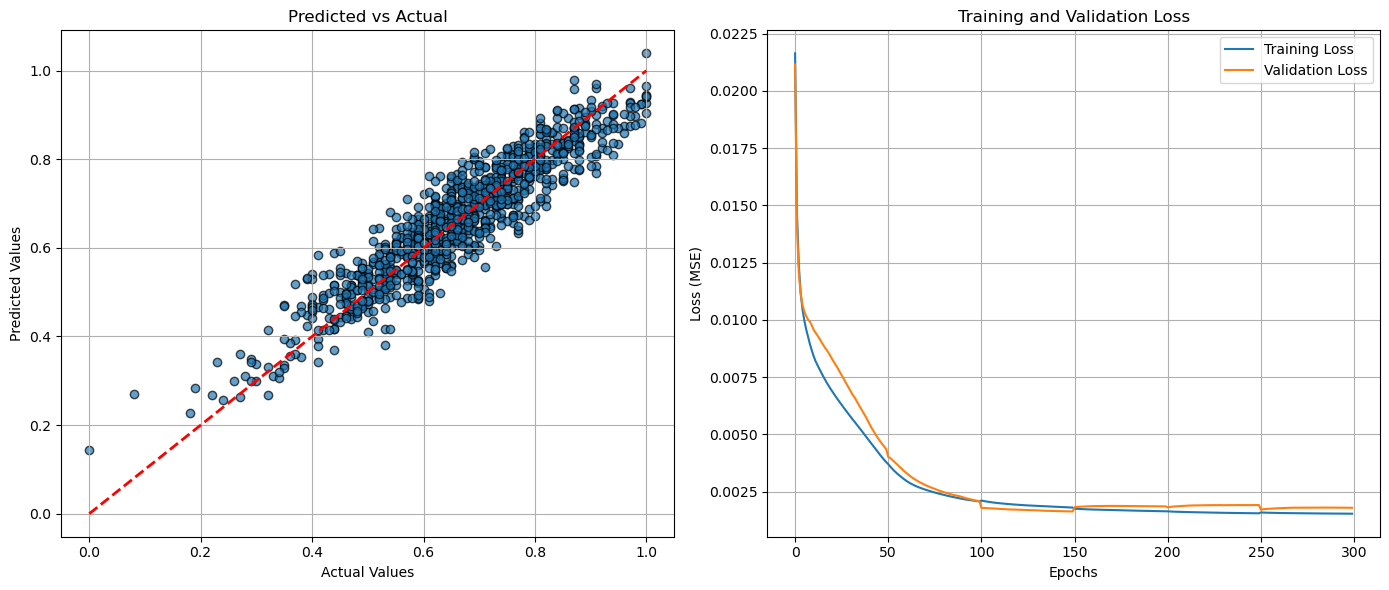

In [8]:
import NeuralNet as NN
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Separate the input and the output features, output is Math Score.
X, y = df_encoded_scaled.drop("math score", axis=1), df_encoded_scaled["math score"]


# Convert DataFrame to numpy arrays for KFold indexing
X = X.to_numpy()
y = y.to_numpy()
# Neural Network Hyperparameters
layers2 = [len(df_encoded_scaled.columns) - 1, 9, 5, 5, 1]  
epochs2 = 50
learning_rate2 = 0.003
fact2 = 'relu'
momentum2 = 0.2
n_splits2 = 6

nn2 = NN.NeuralNet(layers2, epochs2, learning_rate2, momentum2, fact2, n_splits2)
nn2.fit(X, y)
y_pred2 = nn2.predict(X)
training_loss2, validation_loss2 = nn2.loss_epochs()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

mse2 = mean_squared_error(y, y_pred2)
mae2 = mean_absolute_error(y, y_pred2)
mape2 = np.mean(np.abs((y - y_pred2) / np.where(y == 0, 1, y))) * 100

print(f"  - Mean Squared Error (MSE): {mse2:.4f}")
print(f"  - Mean Absolute Error (MAE): {mae2:.4f}")
print(f"  - Mean Absolute Percentage Error (MAPE): {mape2:.4f}%")

# 1. Predicted vs Actual
axes[0].scatter(y, y_pred2, alpha=0.7, edgecolors='k')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# 2. Training and Validation Loss over Epochs
axes[1].plot(training_loss2, label='Training Loss')
axes[1].plot(validation_loss2, label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss (MSE)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

#### Comparison 3

| Number of layers | Layer Structure | Num epochs | Learning rate | Momentum | Activation Function | MAPE | MAE | MSE |
|---|---|---|---|---|---|---|---|---|
|4|[16,9,5,1]|300|0.1|0.9|ReLU|157.3134|1.0157|1.1044|

  - Mean Squared Error (MSE): 0.0241
  - Mean Absolute Error (MAE): 0.1230
  - Mean Absolute Percentage Error (MAPE): 22.9870%


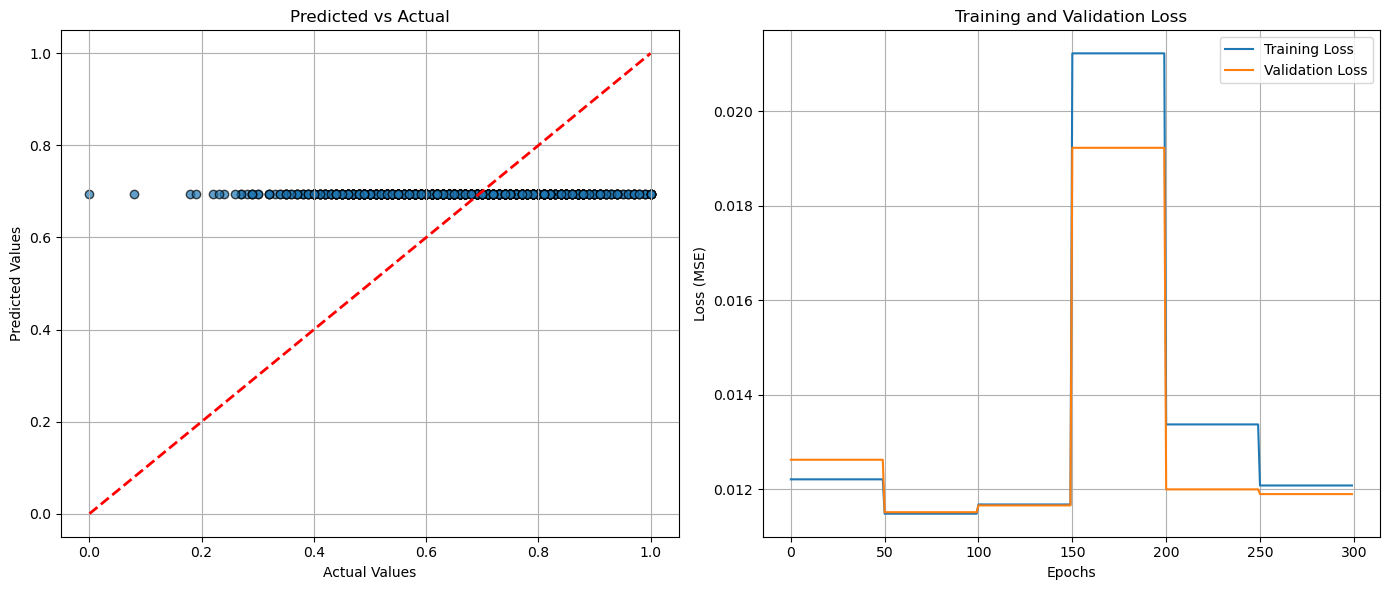

In [9]:
import NeuralNet as NN
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Separate the input and the output features, output is Math Score.
X, y = df_encoded_scaled.drop("math score", axis=1), df_encoded_scaled["math score"]

# Convert DataFrame to numpy arrays for KFold indexing
X = X.to_numpy()
y = y.to_numpy()

# Neural Network Hyperparameters
layers3 = [len(df_encoded_scaled.columns) - 1, 9, 5, 1]  
epochs3 = 50
learning_rate3 = 0.1
fact3 = 'relu'
momentum3 = 0.9
n_splits3 = 6

nn3 = NN.NeuralNet(layers3, epochs3, learning_rate3, momentum3, fact3, n_splits3)
nn3.fit(X, y)
y_pred3 = nn3.predict(X)
training_loss3, validation_loss3 = nn3.loss_epochs()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

mse3 = mean_squared_error(y, y_pred3)
mae3 = mean_absolute_error(y, y_pred3)
mape3= np.mean(np.abs((y - y_pred3) / np.where(y == 0, 1, y))) * 100

print(f"  - Mean Squared Error (MSE): {mse3:.4f}")
print(f"  - Mean Absolute Error (MAE): {mae3:.4f}")
print(f"  - Mean Absolute Percentage Error (MAPE): {mape3:.4f}%")

# 1. Predicted vs Actual
axes[0].scatter(y, y_pred3, alpha=0.7, edgecolors='k')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# 2. Training and Validation Loss over Epochs
axes[1].plot(training_loss3, label='Training Loss')
axes[1].plot(validation_loss3, label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss (MSE)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

#### Comparison 4

| Number of layers | Layer Structure | Num epochs | Learning rate | Momentum | Activation Function | MAPE | MAE | MSE |
|---|---|---|---|---|---|---|---|---|
|7|[16, 9, 9, 5, 5, 1, 1]|200|0.001|0.9|ReLu|28.0256|0.0430|0.0029|

  - Mean Squared Error (MSE): 0.0031
  - Mean Absolute Error (MAE): 0.0448
  - Mean Absolute Percentage Error (MAPE): 28.0038%


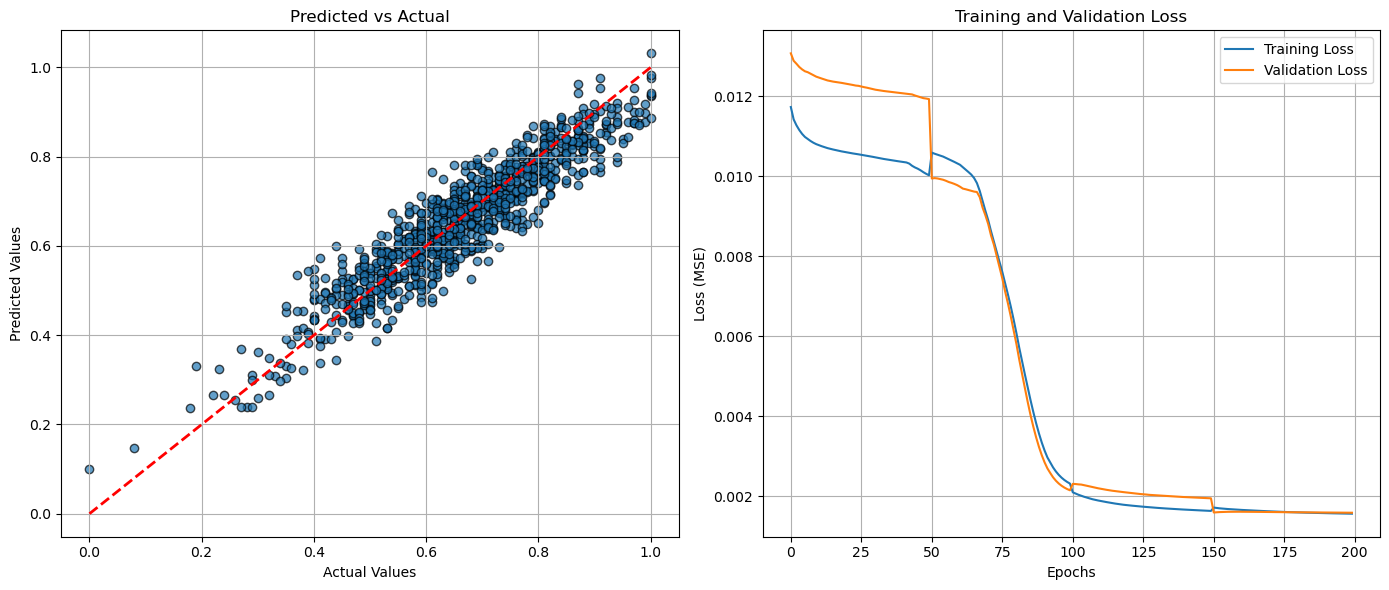

In [10]:
import NeuralNet as NN
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Separate the input and the output features, output is Math Score.
X, y = df_encoded_scaled.drop("math score", axis=1), df_encoded_scaled["math score"]

# Convert DataFrame to numpy arrays for KFold indexing
X = X.to_numpy()
y = y.to_numpy()

# Neural Network Hyperparameters
layers4 = [len(df_encoded_scaled.columns) - 1, 9, 9, 5, 5, 1, 1] 

# Neural Network Hyperparameters
epochs4 = 50
learning_rate4 = 0.001
fact4 = 'relu'
momentum4 = 0.9
n_splits4 = 4

nn4 = NN.NeuralNet(layers4, epochs4, learning_rate4, momentum4, fact4, n_splits4)
nn4.fit(X, y)
y_pred4 = nn4.predict(X)
training_loss4, validation_loss4 = nn4.loss_epochs()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

mse4 = mean_squared_error(y, y_pred4)
mae4 = mean_absolute_error(y, y_pred4)
mape4 = np.mean(np.abs((y - y_pred4) / np.where(y == 0, 1, y))) * 100

print(f"  - Mean Squared Error (MSE): {mse4:.4f}")
print(f"  - Mean Absolute Error (MAE): {mae4:.4f}")
print(f"  - Mean Absolute Percentage Error (MAPE): {mape4:.4f}%")

# 1. Predicted vs Actual
axes[0].scatter(y, y_pred4, alpha=0.7, edgecolors='k')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# 2. Training and Validation Loss over Epochs
axes[1].plot(training_loss4, label='Training Loss')
axes[1].plot(validation_loss4, label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss (MSE)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

#### Comparison 5

| Number of layers | Layer Structure | Num epochs | Learning rate | Momentum | Activation Function | MAPE | MAE | MSE |
|---|---|---|---|---|---|---|---|---|
|5|[16, 9, 9, 5, 1]|200|0.01|0.7|linear|27.8651|0.0429|0.0029|

  - Mean Squared Error (MSE): 0.0029
  - Mean Absolute Error (MAE): 0.0431
  - Mean Absolute Percentage Error (MAPE): 28.1778%


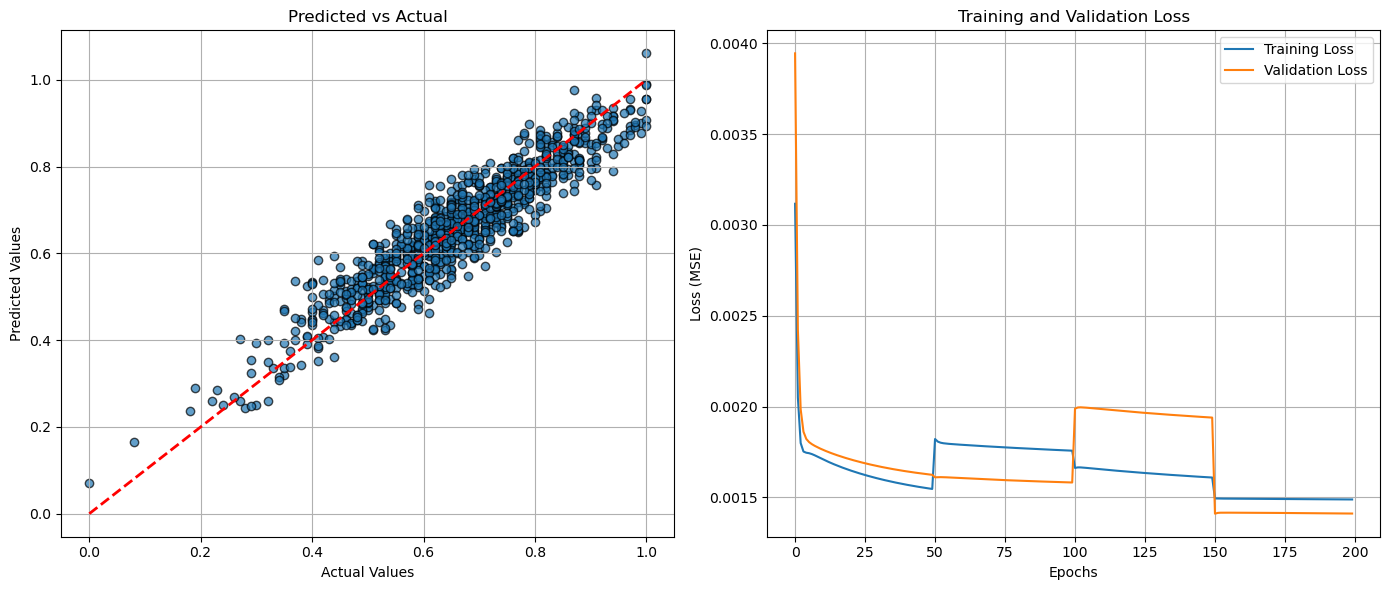

In [11]:
import NeuralNet as NN
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Separate the input and the output features, output is Math Score.
X, y = df_encoded_scaled.drop("math score", axis=1), df_encoded_scaled["math score"]

# Convert DataFrame to numpy arrays for KFold indexing
X = X.to_numpy()
y = y.to_numpy()

# Neural Network Hyperparameters
layers5 = [len(df_encoded_scaled.columns) - 1, 9, 9, 5, 1]  
epochs5 = 50
learning_rate5 = 0.01
fact5 = 'linear'
momentum5 = 0.7
n_splits5 = 4

nn5 = NN.NeuralNet(layers5, epochs5, learning_rate5, momentum5, fact5, n_splits5)
nn5.fit(X, y)
y_pred5 = nn5.predict(X)
training_loss5, validation_loss5 = nn5.loss_epochs()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

mse5 = mean_squared_error(y, y_pred5)
mae5 = mean_absolute_error(y, y_pred5)
mape5 = np.mean(np.abs((y - y_pred5) / np.where(y == 0, 1, y))) * 100

print(f"  - Mean Squared Error (MSE): {mse5:.4f}")
print(f"  - Mean Absolute Error (MAE): {mae5:.4f}")
print(f"  - Mean Absolute Percentage Error (MAPE): {mape5:.4f}%")

# 1. Predicted vs Actual
axes[0].scatter(y, y_pred5, alpha=0.7, edgecolors='k')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# 2. Training and Validation Loss over Epochs
axes[1].plot(training_loss5, label='Training Loss')
axes[1].plot(validation_loss5, label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss (MSE)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

#### Comparison 6

| Number of layers | Layer Structure | Num epochs | Learning rate | Momentum | Activation Function | MAPE | MAE | MSE |
|---|---|---|---|---|---|---|---|---|
|6|[16, 9, 9, 5, 5, 1]|200|0.002|0.9|linear|27.9738|0.0427|0.0029|

  - Mean Squared Error (MSE): 0.0030
  - Mean Absolute Error (MAE): 0.0434
  - Mean Absolute Percentage Error (MAPE): 27.8193%


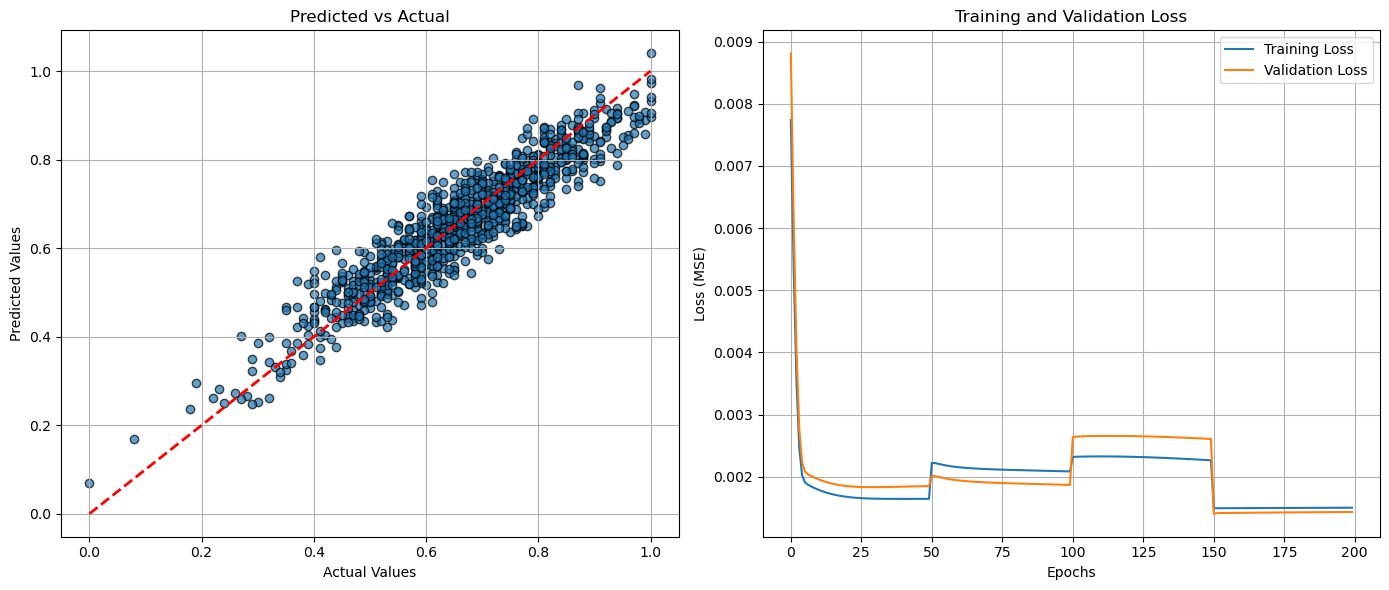

In [12]:
import NeuralNet as NN
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Separate the input and the output features, output is Math Score.
X, y = df_encoded_scaled.drop("math score", axis=1), df_encoded_scaled["math score"]

# Convert DataFrame to numpy arrays for KFold indexing
X = X.to_numpy()
y = y.to_numpy()

# Neural Network Hyperparameters
layers6 = [len(df_encoded_scaled.columns) - 1, 9, 9, 5, 5, 1] 

# Neural Network Hyperparameters
epochs6 = 50
learning_rate6 = 0.002
fact6 = 'linear'
momentum6 = 0.9
n_splits6 = 4

nn6 = NN.NeuralNet(layers6, epochs6, learning_rate6, momentum6, fact6, n_splits6)
nn6.fit(X, y)
y_pred6 = nn6.predict(X)
training_loss6, validation_loss6 = nn6.loss_epochs()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

mse6 = mean_squared_error(y, y_pred6)
mae6 = mean_absolute_error(y, y_pred6)
mape6 = np.mean(np.abs((y - y_pred6) / np.where(y == 0, 1, y))) * 100

print(f"  - Mean Squared Error (MSE): {mse6:.4f}")
print(f"  - Mean Absolute Error (MAE): {mae6:.4f}")
print(f"  - Mean Absolute Percentage Error (MAPE): {mape6:.4f}%")

# 1. Predicted vs Actual
axes[0].scatter(y, y_pred6, alpha=0.7, edgecolors='k')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# 2. Training and Validation Loss over Epochs
axes[1].plot(training_loss6, label='Training Loss')
axes[1].plot(validation_loss6, label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss (MSE)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

#### Comparison 7

| Number of layers | Layer Structure | Num epochs | Learning rate | Momentum | Activation Function | MAPE | MAE | MSE |
|---|---|---|---|---|---|---|---|---|
|4|[16, 9, 5, 1]|200|0.0001|0.5|sigmoid|21.7591|0.1229|0.0238|

  - Mean Squared Error (MSE): 0.0220
  - Mean Absolute Error (MAE): 0.1180
  - Mean Absolute Percentage Error (MAPE): 21.7635%


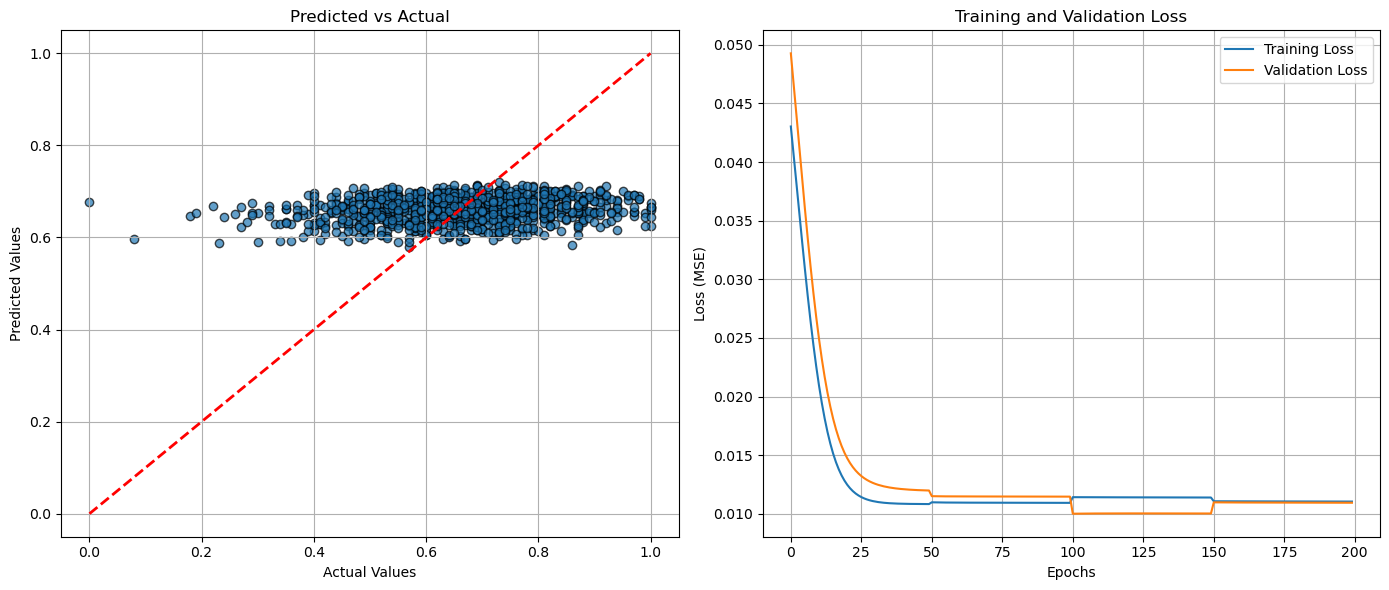

In [13]:
import NeuralNet as NN
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Separate the input and the output features, output is Math Score.
X, y = df_encoded_scaled.drop("math score", axis=1), df_encoded_scaled["math score"]

# Convert DataFrame to numpy arrays for KFold indexing
X = X.to_numpy()
y = y.to_numpy()

# Neural Network Hyperparameters
layers7 = [len(df_encoded_scaled.columns) - 1, 9, 5, 1] 

# Neural Network Hyperparameters
epochs7 = 50
learning_rate7 = 0.0001
fact7 = 'sigmoid'
momentum7 = 0.5
n_splits7 = 4

nn7 = NN.NeuralNet(layers7, epochs7, learning_rate7, momentum7, fact7, n_splits7)
nn7.fit(X, y)
y_pred7 = nn7.predict(X)
training_loss7, validation_loss7 = nn7.loss_epochs()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

mse7 = mean_squared_error(y, y_pred7)
mae7 = mean_absolute_error(y, y_pred7)
mape7 = np.mean(np.abs((y - y_pred7) / np.where(y == 0, 1, y))) * 100

print(f"  - Mean Squared Error (MSE): {mse7:.4f}")
print(f"  - Mean Absolute Error (MAE): {mae7:.4f}")
print(f"  - Mean Absolute Percentage Error (MAPE): {mape7:.4f}%")

# 1. Predicted vs Actual
axes[0].scatter(y, y_pred7, alpha=0.7, edgecolors='k')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# 2. Training and Validation Loss over Epochs
axes[1].plot(training_loss7, label='Training Loss')
axes[1].plot(validation_loss7, label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss (MSE)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

#### Comparison 8

| Number of layers | Layer Structure | Num epochs | Learning rate | Momentum | Activation Function | MAPE | MAE | MSE |
|---|---|---|---|---|---|---|---|---|
|4|[16, 9, 5, 1]|400|0.0001|0.5|sigmoid|21.8626|0.1214|0.0231|

/home/user/Escritorio/NEC/A1_DanielArias_BeatrizEnriquez/NeuralNet.py:108: RuntimeWarning: invalid value encountered in multiply
  self.delta[l] = self.d_fact(self.xi[l]) * np.dot(self.w[l + 1].T, self.delta[l + 1])


ValueError: Input contains NaN.

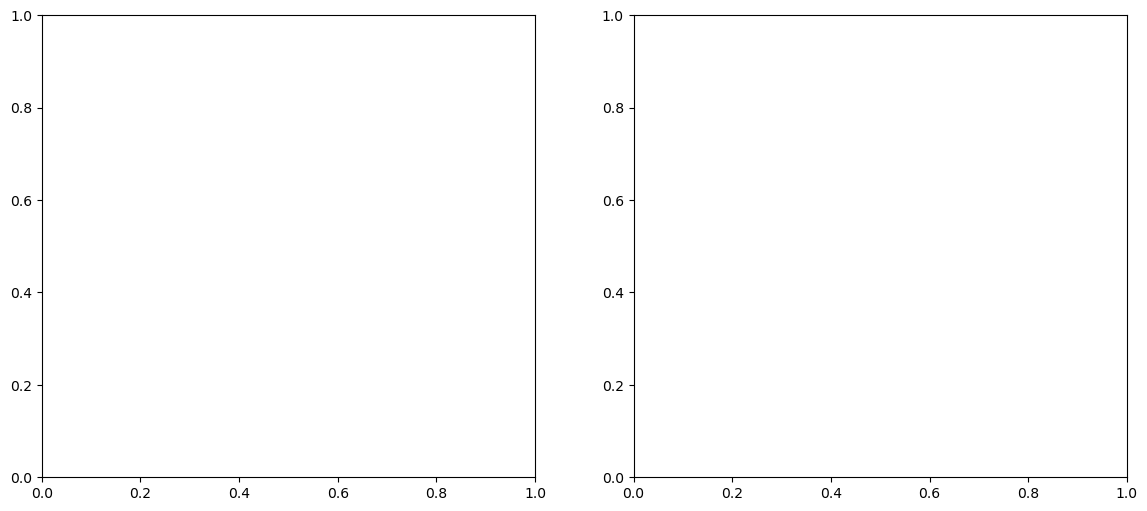

In [15]:
import NeuralNet as NN
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Separate the input and the output features, output is Math Score.
X, y = df_encoded_scaled.drop("math score", axis=1), df_encoded_scaled["math score"]

# Convert DataFrame to numpy arrays for KFold indexing
X = X.to_numpy()
y = y.to_numpy()

# Neural Network Hyperparameters
layers8 = [len(df_encoded_scaled.columns) - 1, 9, 5, 1] 

# Neural Network Hyperparameters
epochs8 = 100
learning_rate8 = 0.0001
fact8 = 'sigmoid'
momentum8 = 0.5
n_splits8 = 4

nn8 = NN.NeuralNet(layers8, epochs8, learning_rate8, momentum8, fact8, n_splits8)
nn8.fit(X, y)
y_pred8 = nn8.predict(X)
training_loss8, validation_loss8 = nn8.loss_epochs()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

mse8 = mean_squared_error(y, y_pred8)
mae8 = mean_absolute_error(y, y_pred8)
mape8 = np.mean(np.abs((y - y_pred8) / np.where(y == 0, 1, y))) * 100

print(f"  - Mean Squared Error (MSE): {mse8:.4f}")
print(f"  - Mean Absolute Error (MAE): {mae8:.4f}")
print(f"  - Mean Absolute Percentage Error (MAPE): {mape8:.4f}%")

# 1. Predicted vs Actual
axes[0].scatter(y, y_pred8, alpha=0.7, edgecolors='k')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# 2. Training and Validation Loss over Epochs
axes[1].plot(training_loss8, label='Training Loss')
axes[1].plot(validation_loss8, label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss (MSE)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

#### Comparison 9

| Number of layers | Layer Structure | Num epochs | Learning rate | Momentum | Activation Function | MAPE | MAE | MSE |
|---|---|---|---|---|---|---|---|---|
|4|[16, 9, 5, 1]|500|0.001|0.5|tanh|27.9716|0.0457|0.0033|

/home/user/Escritorio/NEC/A1_DanielArias_BeatrizEnriquez/NeuralNet.py:108: RuntimeWarning: invalid value encountered in multiply
  self.delta[l] = self.d_fact(self.xi[l]) * np.dot(self.w[l + 1].T, self.delta[l + 1])


ValueError: Input contains NaN.

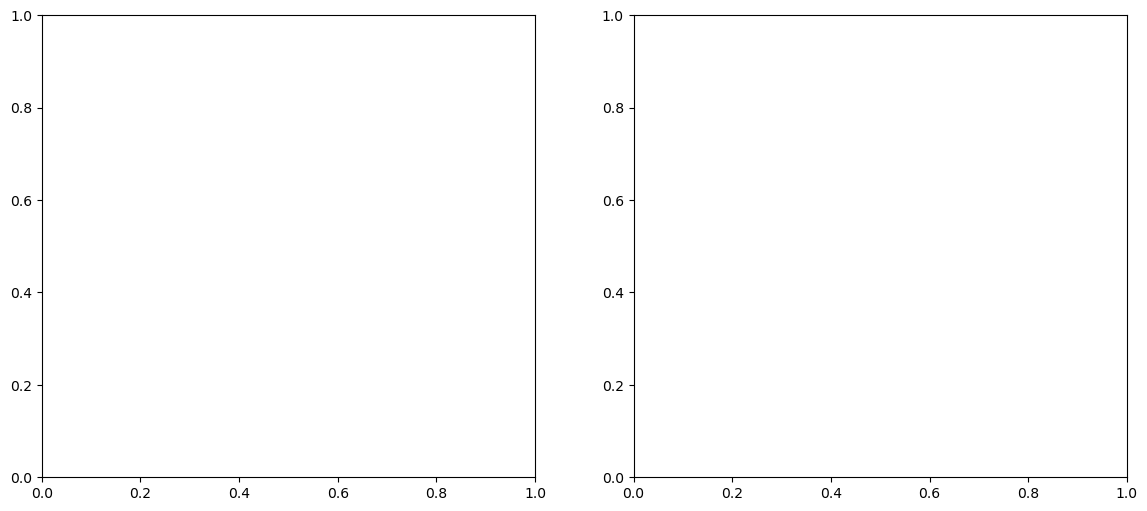

In [16]:
import NeuralNet as NN
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Separate the input and the output features, output is Math Score.
X, y = df_encoded_scaled.drop("math score", axis=1), df_encoded_scaled["math score"]

# Convert DataFrame to numpy arrays for KFold indexing
X = X.to_numpy()
y = y.to_numpy()

# Neural Network Hyperparameters
layers9 = [len(df_encoded_scaled.columns) - 1, 9, 5, 1] 

# Neural Network Hyperparameters
epochs9 = 50
learning_rate9 = 0.001
fact9 = 'tanh'
momentum9 = 0.5
n_splits9 = 10

nn9 = NN.NeuralNet(layers9, epochs9, learning_rate9, momentum9, fact9, n_splits9)
nn9.fit(X, y)
y_pred9 = nn9.predict(X)
training_loss9, validation_loss9 = nn9.loss_epochs()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

mse9 = mean_squared_error(y, y_pred9)
mae9 = mean_absolute_error(y, y_pred9)
mape9 = np.mean(np.abs((y - y_pred9) / np.where(y == 0, 1, y))) * 100

print(f"  - Mean Squared Error (MSE): {mse9:.4f}")
print(f"  - Mean Absolute Error (MAE): {mae9:.4f}")
print(f"  - Mean Absolute Percentage Error (MAPE): {mape9:.4f}%")

# 1. Predicted vs Actual
axes[0].scatter(y, y_pred9, alpha=0.7, edgecolors='k')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# 2. Training and Validation Loss over Epochs
axes[1].plot(training_loss9, label='Training Loss')
axes[1].plot(validation_loss9, label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss (MSE)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

#### Comparison 10

| Number of layers | Layer Structure | Num epochs | Learning rate | Momentum | Activation Function | MAPE | MAE | MSE |
|---|---|---|---|---|---|---|---|---|
|6|[16, 9, 9, 5, 5, 1]|300|0.005|0.9|tanh|28.0200|0.0445|0.0031|

  - Mean Squared Error (MSE): 0.0031
  - Mean Absolute Error (MAE): 0.0445
  - Mean Absolute Percentage Error (MAPE): 28.0200%


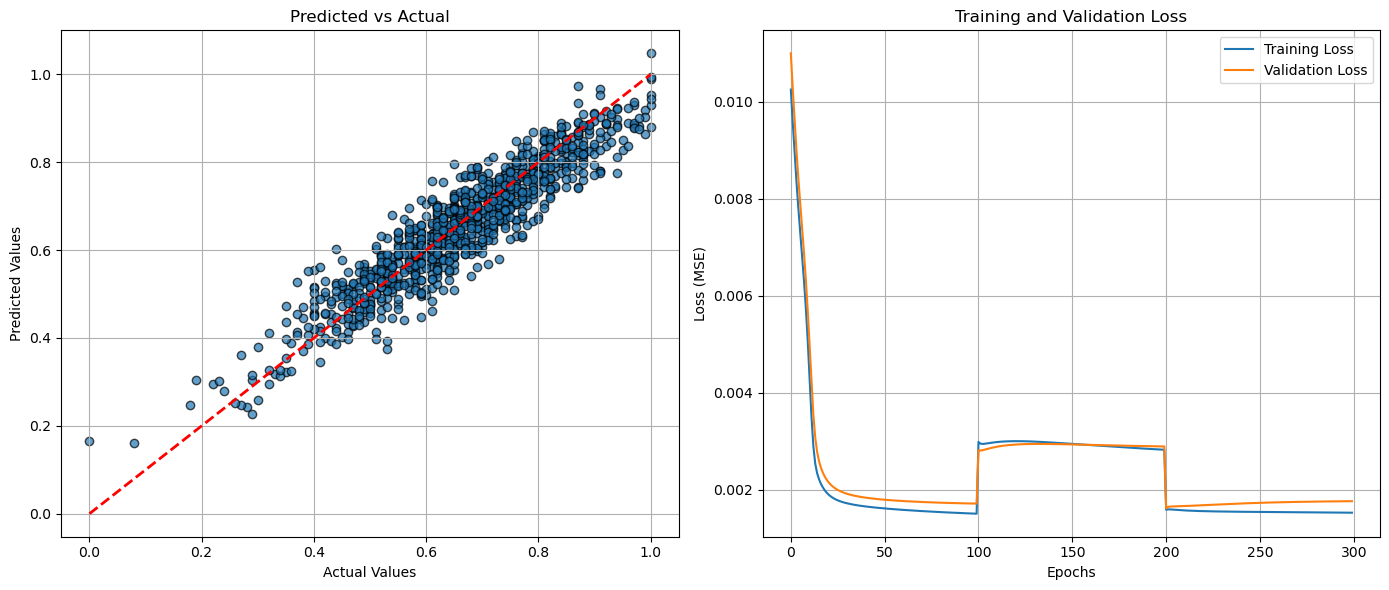

In [17]:
import NeuralNet as NN
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Separate the input and the output features, output is Math Score.
X, y = df_encoded_scaled.drop("math score", axis=1), df_encoded_scaled["math score"]

# Convert DataFrame to numpy arrays for KFold indexing
X = X.to_numpy()
y = y.to_numpy()

# Neural Network Hyperparameters
layers10 = [len(df_encoded_scaled.columns) - 1, 9, 9, 5, 5, 1] 

# Neural Network Hyperparameters
epochs10 = 100
learning_rate10 = 0.005
fact10 = 'tanh'
momentum10 = 0.9
n_splits10 = 3

nn10 = NN.NeuralNet(layers10, epochs10, learning_rate10, momentum10, fact10, n_splits10)
nn10.fit(X, y)
y_pred10 = nn.predict(X)
training_loss10, validation_loss10 = nn10.loss_epochs()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

mse10 = mean_squared_error(y, y_pred10)
mae10 = mean_absolute_error(y, y_pred10)
mape10 = np.mean(np.abs((y - y_pred10) / np.where(y == 0, 1, y))) * 100

print(f"  - Mean Squared Error (MSE): {mse10:.4f}")
print(f"  - Mean Absolute Error (MAE): {mae10:.4f}")
print(f"  - Mean Absolute Percentage Error (MAPE): {mape10:.4f}%")

# 1. Predicted vs Actual
axes[0].scatter(y, y_pred10, alpha=0.7, edgecolors='k')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# 2. Training and Validation Loss over Epochs
axes[1].plot(training_loss10, label='Training Loss')
axes[1].plot(validation_loss10, label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss (MSE)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

#### Comparison 11 (GridSreachCV Hyperparameters)

| Number of layers | Layer Structure | Num epochs | Learning rate | Momentum | Activation Function | MAPE | MAE | MSE |
|---|---|---|---|---|---|---|---|---|
|4|[16, 9, 5, 1]|400|0.001|0.5|relu|28.3124|0.0424|0.0029|

  - Mean Squared Error (MSE): 0.0029
  - Mean Absolute Error (MAE): 0.0424
  - Mean Absolute Percentage Error (MAPE): 28.3124%


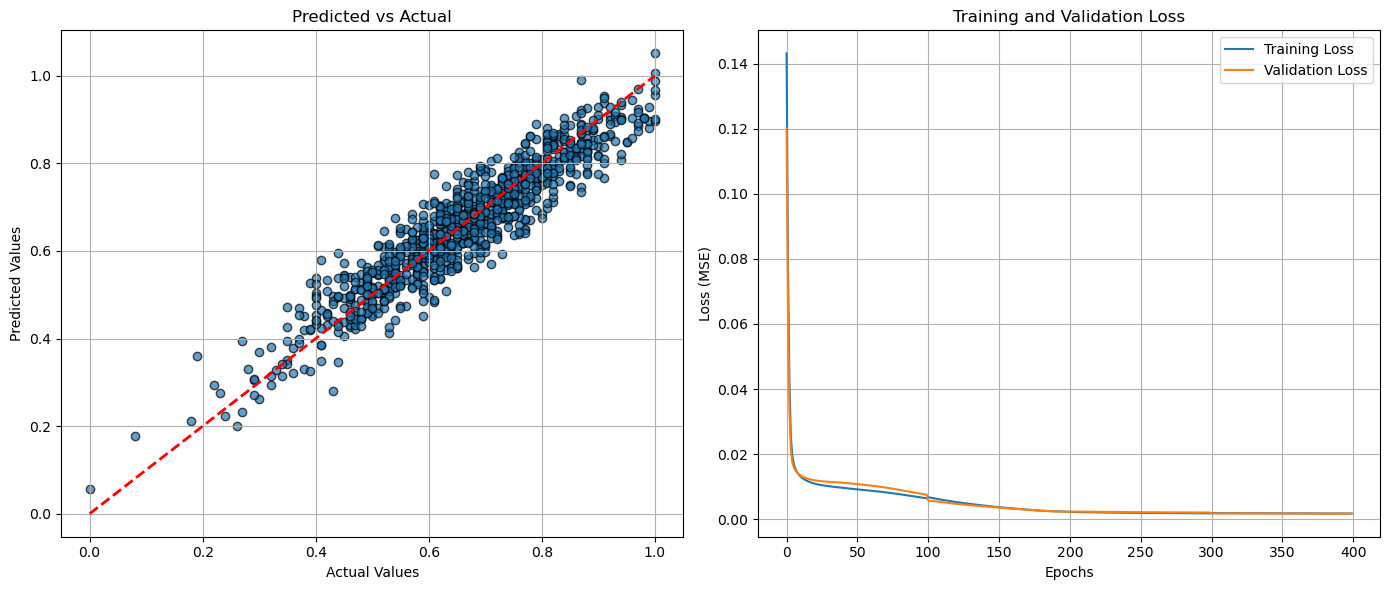

In [ ]:
import NeuralNet as NN
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Separate the input and the output features, output is Math Score.
X, y = df_encoded_scaled.drop("math score", axis=1), df_encoded_scaled["math score"]

# Convert DataFrame to numpy arrays for KFold indexing
X = X.to_numpy()
y = y.to_numpy()

# Neural Network Hyperparameters
layers10 = [len(df_encoded_scaled.columns) - 1, 9, 5, 1] 

# Neural Network Hyperparameters
epochs10 = 100
learning_rate10 = 0.001
fact10 = 'relu'
momentum10 = 0.5
n_splits10 = 4

nn10 = NN.NeuralNet(layers10, epochs10, learning_rate10, momentum10, fact10, n_splits10)
nn10.fit(X, y)
y_pred10 = nn.predict(X)
training_loss10, validation_loss10 = nn10.loss_epochs()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

mse10 = mean_squared_error(y, y_pred10)
mae10 = mean_absolute_error(y, y_pred10)
mape10 = np.mean(np.abs((y - y_pred10) / np.where(y == 0, 1, y))) * 100

print(f"  - Mean Squared Error (MSE): {mse10:.4f}")
print(f"  - Mean Absolute Error (MAE): {mae10:.4f}")
print(f"  - Mean Absolute Percentage Error (MAPE): {mape10:.4f}%")

# 1. Predicted vs Actual
axes[0].scatter(y, y_pred10, alpha=0.7, edgecolors='k')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# 2. Training and Validation Loss over Epochs
axes[1].plot(training_loss10, label='Training Loss')
axes[1].plot(validation_loss10, label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss (MSE)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

### 3.2.3 Hyperparameters NeuralNet comparison


In [26]:
import numpy as np
import pandas as pd

# Metric results for different models
metrics = {
    "Model 1": {"MSE": 0.003, "MAE": 0.0435, "MAPE": 28.0572},
    "Model 2": {"MSE": 0.0028, "MAE": 0.0423, "MAPE": 28.3291},
    "Model 3": {"MSE": 1.1044, "MAE": 1.0157, "MAPE": 157.3134},
    "Model 4": {"MSE": 0.0029, "MAE": 0.0430, "MAPE": 28.0256},
    "Model 5": {"MSE": 0.0029, "MAE": 0.0429, "MAPE": 27.8651},
    "Model 6": {"MSE": 0.0029, "MAE": 0.0427, "MAPE": 27.9738},
    "Model 7": {"MSE": 0.0238, "MAE": 0.1229, "MAPE": 21.7591},
    "Model 8": {"MSE": 0.0231, "MAE": 0.1214, "MAPE": 21.8626},
    "Model 9": {"MSE": 0.0033, "MAE": 0.0457, "MAPE": 27.9716},
    "Model 10": {"MSE": 0.0031, "MAE": 0.0445, "MAPE": 28.02},
    "Model 11": {"MSE": 0.0029, "MAE": 0.0424, "MAPE": 28.3124}
}

# Convert to DataFrame
df = pd.DataFrame(metrics).T

# Normalize metrics
df_normalized = df / df.max()

# Calculate the normalized average
df_normalized["Average"] = df_normalized.mean(axis=1)

# Sort by best average
first_model = df_normalized.sort_values("Average").index[0]
second_model = df_normalized.sort_values("Average").index[1]
third_model = df_normalized.sort_values("Average").index[2]

print("Normalized Metrics:")
print(df_normalized)
print(f"\nBest Model: {first_model}")
print(f"\nBest Second Model: {second_model}")
print(f"\nBest Third Model: {third_model}")


Normalized Metrics:
               MSE       MAE      MAPE   Average
Model 1   0.002716  0.042828  0.178352  0.074632
Model 2   0.002535  0.041646  0.180081  0.074754
Model 3   1.000000  1.000000  1.000000  1.000000
Model 4   0.002626  0.042335  0.178151  0.074371
Model 5   0.002626  0.042237  0.177131  0.073998
Model 6   0.002626  0.042040  0.177822  0.074163
Model 7   0.021550  0.121000  0.138317  0.093622
Model 8   0.020916  0.119523  0.138975  0.093138
Model 9   0.002988  0.044994  0.177808  0.075263
Model 10  0.002807  0.043812  0.178116  0.074912
Model 11  0.002626  0.041745  0.179974  0.074782

Best Model: Model 5

Best Second Model: Model 6

Best Third Model: Model 4


As can be seen in the previous results, the best model corresponts to the model 5 in the previous analysis:

| Number of layers | Layer Structure | Num epochs | Learning rate | Momentum | Activation Function | MAPE | MAE | MSE |
|---|---|---|---|---|---|---|---|---|
|5|[16, 9, 9, 5, 1]|200|0.01|0.7|linear|27.8651|0.0429|0.0029|

The second best model corresponds to the model 6:

| Number of layers | Layer Structure | Num epochs | Learning rate | Momentum | Activation Function | MAPE | MAE | MSE |
|---|---|---|---|---|---|---|---|---|
|6|[16, 9, 9, 5, 5, 1]|200|0.002|0.9|linear|27.9738|0.0427|0.0029|

And the third best model corresponds to the model 4:

| Number of layers | Layer Structure | Num epochs | Learning rate | Momentum | Activation Function | MAPE | MAE | MSE |
|---|---|---|---|---|---|---|---|---|
|7|[16, 9, 9, 5, 5, 1, 1]|200|0.001|0.9|ReLu|28.0256|0.0430|0.0029|

## 3.2 Model result comparison

We are going to compare the results obtained in pour network against two already implemented models. We are going to compare the best results obtained in the previous seciton against the following models.

- A multi-linear regression from scikit-learn (MLR-F)
- A neural network model, which can be used from TensorFlow, Pytorch, Scikit-learn or any other neural network python library (BP-F)

### 3.2.1 Multi-linear regression model (MLR-F)


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

X, y = df_encoded_scaled.drop("math score", axis=1), df_encoded_scaled["math score"]

# Spit data in three sets (Train, Validation and Test)
# Train set: Trains the model
# Validation set: Tune hyperparameters and monitor performance to avoid overfitting
# Test data: Measures the final performance of the model on unseen data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(
    hidden_layer_sizes=(9, 9, 5),  
    activation='identity',           
    solver='adam',               
    max_iter=1000,              
    random_state=42,
    early_stopping=True,
    n_iter_no_change=20
)

# Creating a pipeling in this case is not necessary, but is common practice.
# Pipelines are used to standardize the input features.
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)

mse = mean_squared_error(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
mape = np.mean(np.abs((y_valid - y_pred) / np.where(y_valid == 0, 1, y_valid))) * 100

print(f"- Mean Squared Error (MSE): {mse:.4f}")
print(f"- Mean Absolute Error (MAE): {mae:.4f}")
print(f"- Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

- Mean Squared Error (MSE): 0.0028
- Mean Absolute Error (MAE): 0.0420
- Mean Absolute Percentage Error (MAPE): 6.6493%


Building and training a standard MLP with Scikit-Learn in just a few lines of code is very convenient, but the neural net features are limited. 

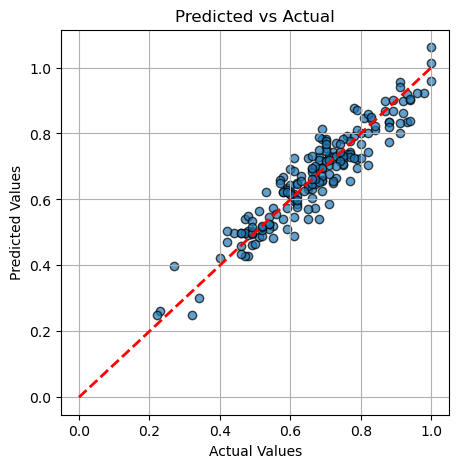

In [30]:
plt.figure(figsize=(5, 5))
plt.scatter(y_valid, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

### 3.2.2 Implementing MLPs with Keras

In [31]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

X, y = df_encoded_scaled.drop("math score", axis=1), df_encoded_scaled["math score"]

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

tf.random.set_seed(42)

# In this case is not necessary to normalize data, but it's common practice
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(9, activation="linear"),
    tf.keras.layers.Dense(9, activation="linear"),
    tf.keras.layers.Dense(5, activation="linear"),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

# This callback stops training when the model does not improve anymore
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=20, #Number of epochs without improvement before stopping
    restore_best_weights=True
)

history = model.fit(
    X_train, 
    y_train, 
    epochs=1000, 
    validation_data=(X_valid, y_valid), 
    verbose=0,  
    callbacks=[early_stopping]  
)
y_pred = model.predict(X_valid, verbose=0)
y_pred = y_pred.ravel()

mse = mean_squared_error(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
mape = np.mean(np.abs((y_valid - y_pred) / np.where(y_valid == 0, 1, y_valid))) * 100

print(f"  - Mean Squared Error (MSE): {mse:.4f}")
print(f"  - Mean Absolute Error (MAE): {mae:.4f}")
print(f"  - Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

/home/user/Descargas/yes/envs/nec/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  - Mean Squared Error (MSE): 0.0028
  - Mean Absolute Error (MAE): 0.0422
  - Mean Absolute Percentage Error (MAPE): 6.7079%


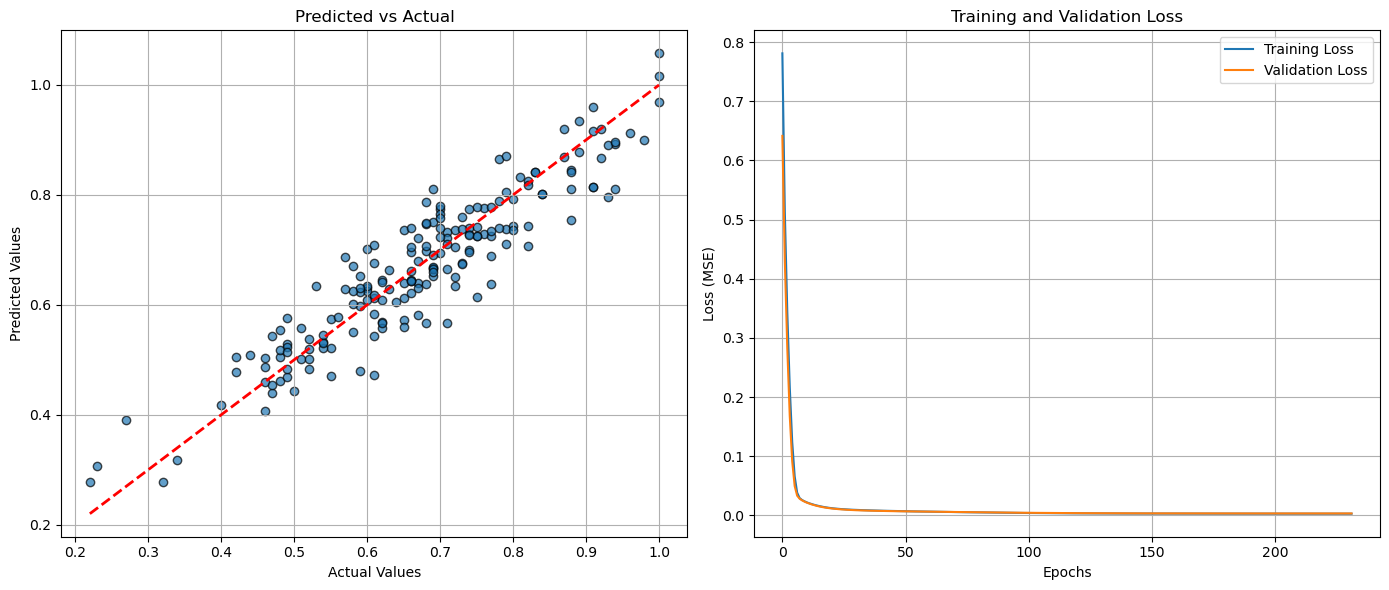

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Predicted vs Actual
axes[0].scatter(y_valid, y_pred, alpha=0.7, edgecolors='k')
axes[0].plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', lw=2)
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].grid(True)

# 2. Training and Validation Loss over Epochs
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss (MSE)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

### 3.2.3 Model comparisons

In [32]:
import numpy as np
import pandas as pd

# Metric results for different models
metrics = {
    "Model BP": {"MSE": 0.0029, "MAE": 0.0429, "MAPE": 27.8651},
    "Model MLR-F": {"MSE": 0.0028, "MAE": 0.0420, "MAPE": 6.6493},
    "Model BP-F": {"MSE": 0.02028, "MAE": 0.0422, "MAPE": 6.7079},

}

# Convert to DataFrame
df = pd.DataFrame(metrics).T

# Normalize metrics
df_normalized = df / df.max()

# Calculate the normalized average
df_normalized["Average"] = df_normalized.mean(axis=1)

# Sort by best average
first_model = df_normalized.sort_values("Average").index[0]
second_model = df_normalized.sort_values("Average").index[1]
third_model = df_normalized.sort_values("Average").index[2]

print("Normalized Metrics:")
print(df_normalized)
print(f"\nBest Model: {first_model}")
print(f"\nBest Second Model: {second_model}")
print(f"\nBest Third Model: {third_model}")


Normalized Metrics:
                  MSE       MAE      MAPE   Average
Model BP     0.142998  1.000000  1.000000  0.714333
Model MLR-F  0.138067  0.979021  0.238625  0.451904
Model BP-F   1.000000  0.983683  0.240728  0.741470

Best Model: Model MLR-F

Best Second Model: Model BP

Best Third Model: Model BP-F


In this case, the best model is the Multiple Linear Regression (MLR-F) provided by sklearn python library.